In [1]:
import numpy as np
import pandas as pd

import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
from tensorflow import keras

from keras.layers import Dropout, Activation
from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model

from keras.layers import LSTM
from keras.layers import Input
from keras.models import Model

from keras.utils.vis_utils import plot_model

In [ ]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [ ]:
physical_devices

In [ ]:
!nvidia-smi

In [5]:
df = pd.read_csv('H:/Datasets/cic-ids-2018/ddos-loic-udp_hoic_21-02-2018.csv', low_memory=True)
df = df.rename(columns={'label': 'Label'})
#df.drop(df.loc[df['Label'] == 'Label'].index, inplace=True)

In [6]:
df.describe()

,dst_port,protocol,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,fwd_pkt_len_mean,...,fwd_act_data_pkts,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.958764e+04,6.037952e+00,3.990401e+05,1.968099e+02,1.309663e+00,6.563581e+03,2.486527e+02,3.666938e+02,2.549479e-01,7.977144e+01,...,1.941294e+02,1.995892e+01,7.521672e+03,2.589427e+03,1.003609e+04,5.446253e+03,3.140514e+04,1.602645e+04,5.723070e+04,1.633481e+04
std,2.719338e+04,6.495848e-01,6.630337e+06,4.899047e+03,1.477423e+00,1.567596e+05,3.257857e+02,4.226960e+02,8.978105e+00,8.511139e+01,...,4.899113e+03,7.395666e-01,2.033449e+05,1.034448e+05,2.825239e+05,1.568789e+05,8.419967e+05,4.340229e+05,1.421182e+06,5.894628e+05
min,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+01,6.000000e+00,1.408000e+03,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,6.000000e+00,4.720000e+03,3.000000e+00,0.000000e+00,2.470000e+02,0.000000e+00,3.200000e+01,0.000000e+00,3.200000e+01,...,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,5.355300e+04,6.000000e+00,1.464900e+04,5.000000e+00,2.000000e+00,9.350000e+02,3.160000e+02,9.350000e+02,0.000000e+00,1.870000e+02,...,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553400e+04,1.700000e+01,1.200000e+08,3.096290e+05,1.240000e+02,9.908128e+06,9.121000e+03,2.224000e+03,9.760000e+02,9.760000e+02,...,3.096280e+05,4.400000e+01,2.000000e+07,1.620000e+07,2.800000e+07,2.000000e+07,1.060000e+08,5.030000e+07,1.060000e+08,1.060000e+08


In [7]:
df.head()

,dst_port,protocol,timestamp,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,...,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,Label
0,80,6,21/02/2018 08:33:25,37953,5,3,135,127,135,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1,500,17,21/02/2018 08:33:06,117573474,3,0,1500,0,500,500,...,8,0.0,0.0,0,0,58800000.0,23800000.0,75600000,42000000,Benign
2,500,17,21/02/2018 08:33:06,117573474,3,0,1500,0,500,500,...,8,0.0,0.0,0,0,58800000.0,23800000.0,75600000,42000000,Benign
3,500,17,21/02/2018 08:33:11,99743998,5,0,2500,0,500,500,...,8,4000290.0,0.0,4000290,4000290,31900000.0,37900000.0,75600000,7200397,Benign
4,500,17,21/02/2018 08:33:11,99743999,5,0,2500,0,500,500,...,8,4000286.0,0.0,4000286,4000286,31900000.0,37900000.0,75600000,7200399,Benign


In [8]:
df["Label"].value_counts()

DDOS attack-HOIC        686012
Benign                  360833
DDOS attack-LOIC-UDP      1730
Name: Label, dtype: int64

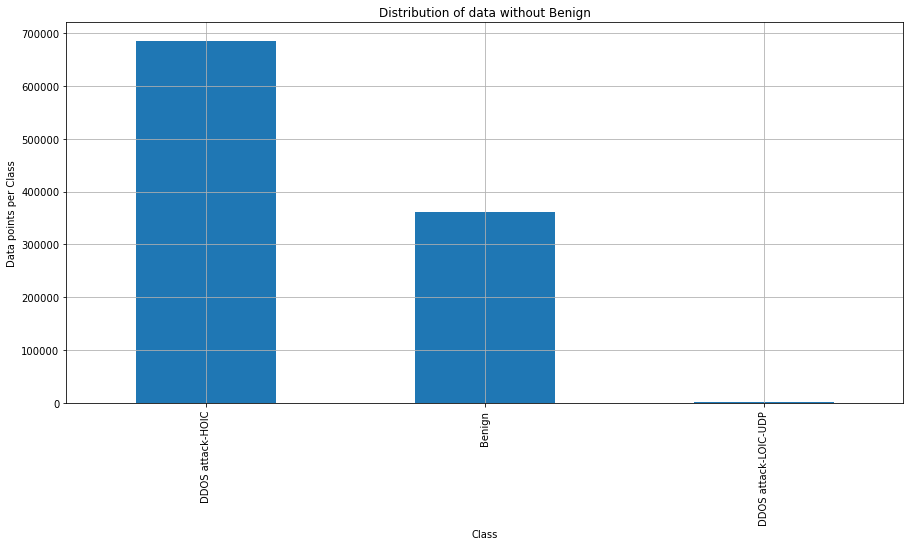

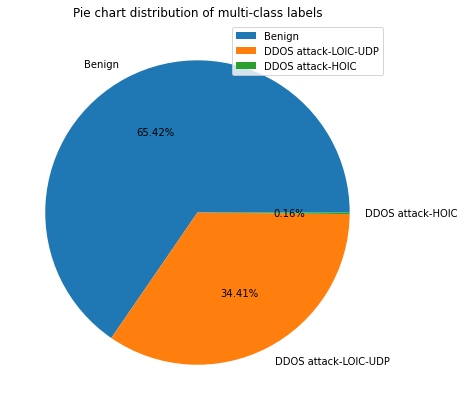

In [9]:
plt.figure(figsize=(15,7))
class_distribution = df[df["Label"] != "BENIGN"]["Label"].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of data without Benign')
plt.grid()
plt.show()


# pie chart distribution of multi-class labels
plt.figure(figsize=(15,7))
plt.pie(df['Label'].value_counts(),labels=df['Label'].unique(),autopct='%0.2f%%')
plt.title('Pie chart distribution of multi-class labels')
plt.legend()
plt.savefig('Pie_chart_multi.png')
plt.show()

In [10]:
metadata = ['fl_dur' #Flow duration
,'tot_fw_pk' #Total packets in the forward direction
,'tot_bw_pk' #Total packets in the backward direction
,'tot_l_fw_pkt' #Total size of packet in forward direction
,'fw_pkt_l_max' #Maximum size of packet in forward direction
,'fw_pkt_l_min' #Minimum size of packet in forward direction
,'fw_pkt_l_avg' #Average size of packet in forward direction
,'fw_pkt_l_std' #Standard deviation size of packet in forward direction
,'Bw_pkt_l_max' #Maximum size of packet in backward direction
,'Bw_pkt_l_min' #Minimum size of packet in backward direction
,'Bw_pkt_l_avg' #Mean size of packet in backward direction
,'Bw_pkt_l_std' #Standard deviation size of packet in backward direction
,'fl_byt_s' #flow byte rate that is number of packets transferred per second
,'fl_pkt_s' #flow packets rate that is number of packets transferred per second
,'fl_iat_avg' #Average time between two flows
,'fl_iat_std' #Standard deviation time two flows
,'fl_iat_max' #Maximum time between two flows
,'fl_iat_min' #Minimum time between two flows
,'fw_iat_tot' #Total time between two packets sent in the forward direction
,'fw_iat_avg' #Mean time between two packets sent in the forward direction
,'fw_iat_std' #Standard deviation time between two packets sent in the forward direction
,'fw_iat_max' #Maximum time between two packets sent in the forward direction
,'fw_iat_min' #Minimum time between two packets sent in the forward direction
,'bw_iat_tot' #Total time between two packets sent in the backward direction
,'bw_iat_avg' #Mean time between two packets sent in the backward direction
,'bw_iat_std' #Standard deviation time between two packets sent in the backward direction
,'bw_iat_max' #Maximum time between two packets sent in the backward direction
,'bw_iat_min' #Minimum time between two packets sent in the backward direction
,'fw_psh_flag' #Number of times the PSH flag was set in packets travelling in the forward direction (0 for UDP)
,'bw_psh_flag' #Number of times the PSH flag was set in packets travelling in the backward direction (0 for UDP)
,'fw_urg_flag' #Number of times the URG flag was set in packets travelling in the forward direction (0 for UDP)
,'bw_urg_flag' #Number of times the URG flag was set in packets travelling in the backward direction (0 for UDP)
,'fw_hdr_len' #Total bytes used for headers in the forward direction
,'bw_hdr_len' #Total bytes used for headers in the forward direction
,'fw_pkt_s' #Number of forward packets per second
,'bw_pkt_s' #Number of backward packets per second
,'pkt_len_min' #Minimum length of a flow
,'pkt_len_max' #Maximum length of a flow
,'pkt_len_avg' #Mean length of a flow
,'pkt_len_std' #Standard deviation length of a flow
,'pkt_len_va' #Minimum inter-arrival time of packet
,'fin_cnt' #Number of packets with FIN
,'syn_cnt' #Number of packets with SYN
,'rst_cnt' #Number of packets with RST
,'pst_cnt' #Number of packets with PUSH
,'ack_cnt' #Number of packets with ACK
,'urg_cnt' #Number of packets with URG
,'cwe_cnt' #Number of packets with CWE
,'ece_cnt' #Number of packets with ECE
,'down_up_ratio' #Download and upload ratio
,'pkt_size_avg' #Average size of packet
,'fw_seg_avg' #Average size observed in the forward direction
,'bw_seg_avg' #Average size observed in the backward direction
,'fw_byt_blk_avg' #Average number of bytes bulk rate in the forward direction
,'fw_pkt_blk_avg' #Average number of packets bulk rate in the forward direction
,'fw_blk_rate_avg' #Average number of bulk rate in the forward direction
,'bw_byt_blk_avg' #Average number of bytes bulk rate in the backward direction
,'bw_pkt_blk_avg' #Average number of packets bulk rate in the backward direction
,'bw_blk_rate_avg' #Average number of bulk rate in the backward direction
,'subfl_fw_pk' #The average number of packets in a sub flow in the forward direction
,'subfl_fw_byt' #The average number of bytes in a sub flow in the forward direction
,'subfl_bw_pkt' #The average number of packets in a sub flow in the backward direction
,'subfl_bw_byt' #The average number of bytes in a sub flow in the backward direction
,'fw_win_byt' #Number of bytes sent in initial window in the forward direction
,'bw_win_byt' ## of bytes sent in initial window in the backward direction
,'Fw_act_pkt' ## of packets with at least 1 byte of TCP data payload in the forward direction
,'fw_seg_min' #Minimum segment size observed in the forward direction
,'atv_avg' #Mean time a flow was active before becoming idle
,'atv_std' #Standard deviation time a flow was active before becoming idle
,'atv_max' #Maximum time a flow was active before becoming idle
,'atv_min' #Minimum time a flow was active before becoming idle
,'idl_avg' #Mean time a flow was idle before becoming active
,'idl_std' #Standard deviation time a flow was idle before becoming active
,'idl_max' #Maximum time a flow was idle before becoming active
,'idl_min' #Minimum time a flow was idle before becoming active
]

In [11]:
#features = df.columns

In [12]:
features = ['Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
       'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
       'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']

In [13]:
# Remove columns with only values of 0
useless_columns = ['dst_port', 'protocol', 'timestamp']
df.drop(labels=useless_columns, axis='columns', inplace=True)
print('After dropping some columns: \n\t there are {} columns and {} rows'.format(len(df.columns), len(df)))

features = df.columns

After dropping some columns: 
	 there are 77 columns and 1048575 rows


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder


#drop na values and reset index
data_clean = df.dropna().reset_index()

# label encoding
labelencoder = LabelEncoder()
data_clean['Label'] = labelencoder.fit_transform(data_clean['Label'])

data_clean['Label'].value_counts()

data_np = data_clean.to_numpy(dtype="float32")
data_np = data_np[~np.isinf(data_np).any(axis=1)]

#del df

X = data_np[:, 0:76]

enc = OneHotEncoder()

Y = enc.fit_transform(data_np[:,77:]).toarray()

In [15]:
data_clean.shape

(1048575, 78)

In [16]:
data_clean.columns

Index(['index', 'flow_duration', 'tot_fwd_pkts', 'tot_bwd_pkts',
       'totlen_fwd_pkts', 'totlen_bwd_pkts', 'fwd_pkt_len_max',
       'fwd_pkt_len_min', 'fwd_pkt_len_mean', 'fwd_pkt_len_std',
       'bwd_pkt_len_max', 'bwd_pkt_len_min', 'bwd_pkt_len_mean',
       'bwd_pkt_len_std', 'flow_byts_s', 'flow_pkts_s', 'flow_iat_mean',
       'flow_iat_std', 'flow_iat_max', 'flow_iat_min', 'fwd_iat_tot',
       'fwd_iat_mean', 'fwd_iat_std', 'fwd_iat_max', 'fwd_iat_min',
       'bwd_iat_tot', 'bwd_iat_mean', 'bwd_iat_std', 'bwd_iat_max',
       'bwd_iat_min', 'fwd_psh_flags', 'bwd_psh_flags', 'fwd_urg_flags',
       'bwd_urg_flags', 'fwd_header_len', 'bwd_header_len', 'fwd_pkts_s',
       'bwd_pkts_s', 'pkt_len_min', 'pkt_len_max', 'pkt_len_mean',
       'pkt_len_std', 'pkt_len_var', 'fin_flag_cnt', 'syn_flag_cnt',
       'rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt', 'urg_flag_cnt',
       'cwe_flag_count', 'ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg',
       'fwd_seg_size_avg', 'bwd_se

In [17]:
data_clean.head()

,index,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,fwd_pkt_len_mean,fwd_pkt_len_std,...,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,Label
0,0,37953,5,3,135,127,135,0,27.0,60.373835,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
1,1,117573474,3,0,1500,0,500,500,500.0,0.000000,...,8,0.0,0.0,0,0,58800000.0,23800000.0,75600000,42000000,0
2,2,117573474,3,0,1500,0,500,500,500.0,0.000000,...,8,0.0,0.0,0,0,58800000.0,23800000.0,75600000,42000000,0
3,3,99743998,5,0,2500,0,500,500,500.0,0.000000,...,8,4000290.0,0.0,4000290,4000290,31900000.0,37900000.0,75600000,7200397,0
4,4,99743999,5,0,2500,0,500,500,500.0,0.000000,...,8,4000286.0,0.0,4000286,4000286,31900000.0,37900000.0,75600000,7200399,0


In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.25, random_state=2, shuffle=True)

_features = X.shape[1]
n_classes = Y.shape[1]

# DNN

In [19]:
model = Sequential()

model.add(Dense(128, input_dim=_features, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(n_classes))
model.add(Activation('softmax'))
model.summary() 

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='BinaryCrossentropy', optimizer=opt, metrics=['accuracy'])

early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                  patience=3, min_lr=0.0001)
    
history = model.fit(X_train, Y_train,
                              batch_size=500,
                              epochs=30,
                              verbose=True,
                              validation_data=(X_test, Y_test),
                              callbacks=[reduce_lr, early_stop_callback])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               9856      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 3

In [20]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test = Y_test.argmax(axis=1)

In [21]:
pred.shape
y_test.shape

(262144,)

In [22]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sn

confMat = confusion_matrix(y_test, pred)
confMat

array([[ 89828,      0,      0],
       [     0, 171853,      0],
       [     0,      0,    463]], dtype=int64)

<AxesSubplot:>

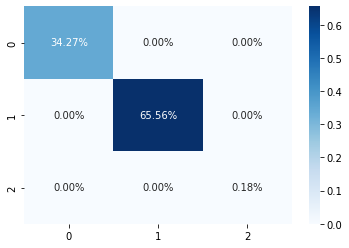

In [23]:
cf_matrix = confusion_matrix(y_test, pred)
sn.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [24]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing

start = dt.datetime.now()

escore = model.evaluate(X_test, Y_test, batch_size=32)
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(Y_test,axis=1)

score = metrics.accuracy_score(y_eval, pred)
rscore = recall_score(y_eval, pred, average='weighted')
ascore = precision_score(y_eval, pred, average='weighted')
f1score= f1_score(y_eval, pred, average='weighted') #F1 = 2 * (precision * recall) / (precision + recall) for manual

lb = preprocessing.LabelBinarizer()
lb.fit(y_eval)
y_eval = lb.transform(y_eval)
pred = lb.transform(pred)
roc_score = roc_auc_score(y_eval, pred)

print('Completed')
print('Time taken:',dt.datetime.now()-start)

print("Validation score: {}".format(score))
print("Evaluation score: {}".format(escore))
print("Recall score: {}".format(rscore))
print("Precision score: {}".format(ascore))
print("F1 Measure score: {}".format(f1score))
print("ROC-AUC score: {}".format(roc_score))

8192/8192 [==============================] - 20s 2ms/step - loss: 7.3974e-11 - accuracy: 1.0000
Completed
Time taken: 0:00:27.998857
Validation score: 1.0
Evaluation score: [7.397397971953268e-11, 1.0]
Recall score: 1.0
Precision score: 1.0
F1 Measure score: 1.0
ROC-AUC score: 1.0


In [25]:
# Plot for training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

In [26]:
start_by_epoch = 1
epochs = range(start_by_epoch, len(loss_values) + 1)

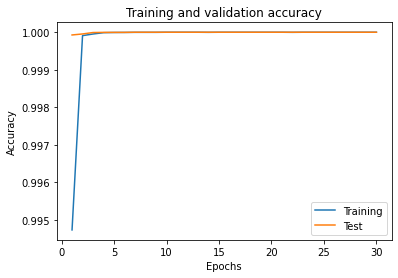

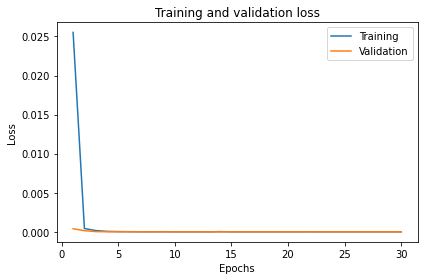

<Figure size 432x288 with 0 Axes>

In [27]:
# Exploratory data analysis
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

plt.plot(epochs, acc[start_by_epoch-1:], label='Training accuracy')
plt.plot(epochs, val_acc[start_by_epoch-1:], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Test'], loc='lower right')

plt.show()
plt.clf()


#plt.subplot(212)

plt.plot(epochs, loss_values[start_by_epoch-1:], label='Training Loss')
plt.plot(epochs, val_loss_values[start_by_epoch-1:], label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()

plt.show()
plt.clf()

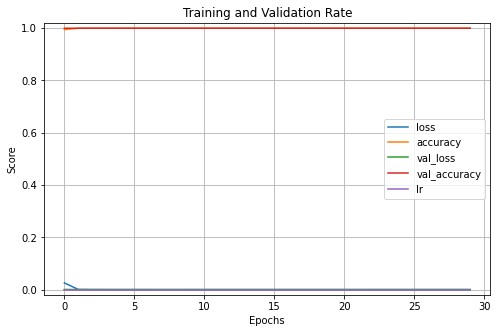

In [28]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(-0.02,1.02)
plt.title('Training and Validation Rate')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.show()

# CNN

In [29]:
# In order to ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from keras.models import Sequential
from keras import callbacks
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout, Reshape
from sklearn import metrics
from hyperopt import fmin, hp, tpe, Trials, STATUS_OK
from hyperopt.plotting import main_plot_history, main_plot_vars
import uuid
import gc
from tensorflow import keras
import tensorflow as tf

K = keras.backend

X_train = X_train.reshape(X_train.shape[0], 76, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 76, 1).astype('float32')


# CNN Model
model = Sequential()
model.add(Convolution1D(filters=128, kernel_size=6, input_shape=(_features, 1)))
model.add(Activation('relu'))
model.add(Convolution1D(filters=256, kernel_size=6))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(n_classes))
model.add(Activation('softmax'))
model.summary() 

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

early_stop_callback = keras.callbacks.EarlyStopping(monitor='loss', patience=5)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                  patience=3, min_lr=0.0001)
    
history = model.fit(X_train, Y_train,
                              batch_size=500,
                              epochs=30,
                              verbose=True,
                              validation_data=(X_test, Y_test),
                              callbacks=[reduce_lr, early_stop_callback])  

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 71, 128)           896       
                                                                 
 activation_1 (Activation)   (None, 71, 128)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 66, 256)           196864    
                                                                 
 activation_2 (Activation)   (None, 66, 256)           0         
                                                                 
 flatten (Flatten)           (None, 16896)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               4325632   
                                                                 
 dropout_3 (Dropout)         (None, 256)              

In [30]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
balanced_score = metrics.balanced_accuracy_score(np.argmax(Y_test, axis=1), y_pred) * 100
    
best_loss = np.amin(history.history['val_loss']) 
print('Best loss: {}'.format(best_loss))
print('Balanced Acc loss: {}'.format(balanced_score))
    
    
import tensorflow.keras.backend as K
print('Learning Rate - ')
print(K.eval(model.optimizer.lr)) 
print('==================================')
model.summary()

Best loss: 2.7284838884783502e-12
Balanced Acc loss: 100.0
Learning Rate - 
1e-04
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 71, 128)           896       
                                                                 
 activation_1 (Activation)   (None, 71, 128)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 66, 256)           196864    
                                                                 
 activation_2 (Activation)   (None, 66, 256)           0         
                                                                 
 flatten (Flatten)           (None, 16896)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               4325632   
                                      

In [31]:
# Plot for training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

In [32]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing

start = dt.datetime.now()

escore = model.evaluate(X_test, Y_test, batch_size=32)
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(Y_test,axis=1)

score = metrics.accuracy_score(y_eval, pred)
rscore = recall_score(y_eval, pred, average='weighted')
ascore = precision_score(y_eval, pred, average='weighted')
f1score= f1_score(y_eval, pred, average='weighted') #F1 = 2 * (precision * recall) / (precision + recall) for manual

lb = preprocessing.LabelBinarizer()
lb.fit(y_eval)
y_eval = lb.transform(y_eval)
pred = lb.transform(pred)
roc_score = roc_auc_score(y_eval, pred)

print('Completed')
print('Time taken:',dt.datetime.now()-start)

print("Validation score: {}".format(score))
print("Evaluation score: {}".format(escore))
print("Recall score: {}".format(rscore))
print("Precision score: {}".format(ascore))
print("F1 Measure score: {}".format(f1score))
print("ROC-AUC score: {}".format(roc_score))

8192/8192 [==============================] - 22s 3ms/step - loss: 2.7285e-12 - accuracy: 1.0000
Completed
Time taken: 0:00:32.593092
Validation score: 1.0
Evaluation score: [2.7284836716379157e-12, 1.0]
Recall score: 1.0
Precision score: 1.0
F1 Measure score: 1.0
ROC-AUC score: 1.0


In [33]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test = Y_test.argmax(axis=1)

In [34]:
pred.shape
y_test.shape

(262144,)

In [35]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sn

confMat = confusion_matrix(y_test, pred)
confMat

array([[ 89828,      0,      0],
       [     0, 171853,      0],
       [     0,      0,    463]], dtype=int64)

<AxesSubplot:>

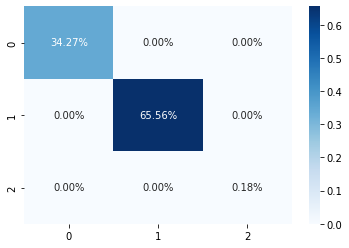

In [36]:
cf_matrix = confusion_matrix(y_test, pred)
sn.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

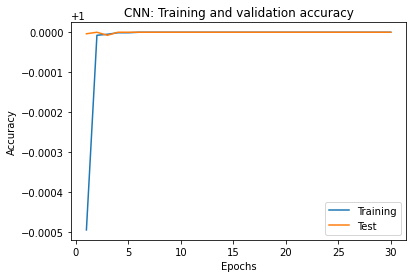

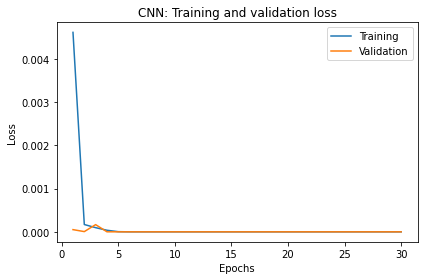

<Figure size 432x288 with 0 Axes>

In [37]:
start_by_epoch = 1
epochs = range(start_by_epoch, len(loss_values) + 1)

plt.plot(epochs, acc[start_by_epoch-1:], label='Training accuracy')
plt.plot(epochs, val_acc[start_by_epoch-1:], label='Validation accuracy')
plt.title('CNN: Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Test'], loc='lower right')

plt.show()
plt.clf()

#plt.subplot(212)

plt.plot(epochs, loss_values[start_by_epoch-1:], label='Training Loss')
plt.plot(epochs, val_loss_values[start_by_epoch-1:], label='Validation Loss')
plt.title('CNN: Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()

plt.show()
plt.clf()

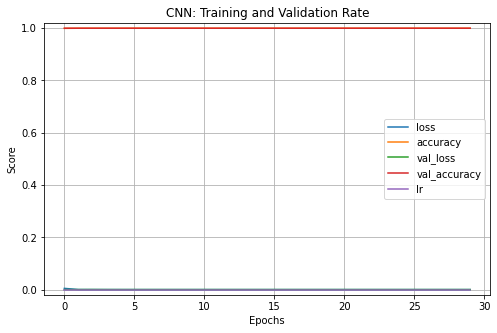

In [38]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(-0.02,1.02)
plt.title('CNN: Training and Validation Rate')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.show()

# AutoEncoder

In [19]:
from keras import regularizers
from keras.layers import Dense, LeakyReLU, BatchNormalization
from keras import Input
from sklearn.preprocessing import MinMaxScaler

In [50]:
input_dim = X_train.shape[1]

autoencoder = tf.keras.models.Sequential([
    
    # encode
    tf.keras.layers.Dense(input_dim, activation='elu', input_shape=(input_dim, )), 
    tf.keras.layers.Dense(512, activation='elu'),
    tf.keras.layers.Dense(256, activation='elu'),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(80, activation='elu'),
    
    # decode
    tf.keras.layers.Dense(80, activation='elu'),
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(256, activation='elu'),
    tf.keras.layers.Dense(512, activation='elu'),
    tf.keras.layers.Dense(input_dim, activation='elu')    
    
])

#optimizer
opt = keras.optimizers.Adam(learning_rate=0.0001)


autoencoder.compile(optimizer=opt, 
                    loss="mse",
                    metrics=["accuracy"])

# print an overview of our model
autoencoder.summary();

early_stop_callback = keras.callbacks.EarlyStopping(monitor='loss', patience=5)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                  patience=3, min_lr=0.0001)

history = autoencoder.fit(
    X_train, X_train,    
    epochs=30,
    batch_size=32,
    validation_data=(X_test, X_test), callbacks=[reduce_lr, early_stop_callback]
);

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_110 (Dense)           (None, 76)                5852      
                                                                 
 dense_111 (Dense)           (None, 256)               19712     
                                                                 
 dense_112 (Dense)           (None, 128)               32896     
                                                                 
 dense_113 (Dense)           (None, 80)                10320     
                                                                 
 dense_114 (Dense)           (None, 80)                6480      
                                                                 
 dense_115 (Dense)           (None, 128)               10368     
                                                                 
 dense_116 (Dense)           (None, 256)             

In [51]:
# predicting target attribute on testing dataset
test_results = autoencoder.evaluate(X_test, X_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

8192/8192 [==============================] - 7s 834us/step - loss: 0.1461 - accuracy: 0.9939
Test results - Loss: 0.14614886045455933 - Accuracy: 0.9938545227050781%


In [52]:
# Plot for training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

start_by_epoch = 1
epochs = range(start_by_epoch, len(loss_values) + 1)

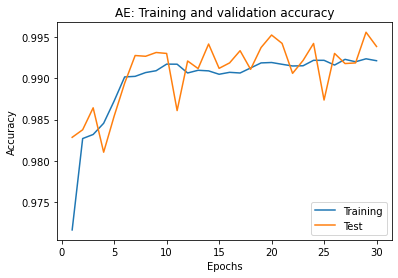

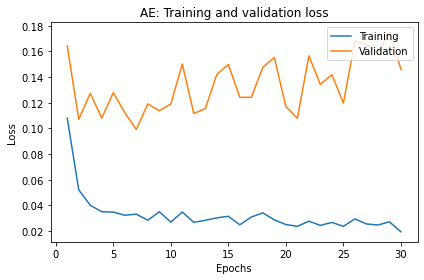

<Figure size 432x288 with 0 Axes>

In [53]:
plt.plot(epochs, acc[start_by_epoch-1:], label='Training accuracy')
plt.plot(epochs, val_acc[start_by_epoch-1:], label='Validation accuracy')
plt.title('AE: Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Test'], loc='lower right')

plt.show()
plt.clf()

#plt.subplot(212)

plt.plot(epochs, loss_values[start_by_epoch-1:], label='Training Loss')
plt.plot(epochs, val_loss_values[start_by_epoch-1:], label='Validation Loss')
plt.title('AE: Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()

plt.show()
plt.clf()

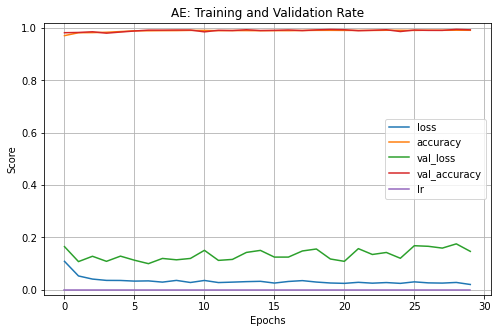

In [54]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(-0.02,1.02)
plt.title('AE: Training and Validation Rate')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.show()

In [55]:
pred = autoencoder.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test = Y_test.argmax(axis=1)

In [56]:
pred.shape
y_test.shape

(262144,)

<AxesSubplot:>

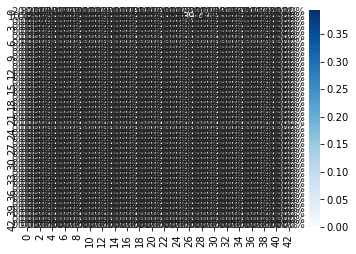

In [57]:
confMat = confusion_matrix(y_test, pred)
confMat

cf_matrix = confusion_matrix(y_test, pred)
sn.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [58]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing

start = dt.datetime.now()

escore = autoencoder.evaluate(X_test, X_test, batch_size=32)
pred = autoencoder.predict(X_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(X_test,axis=1)

score = metrics.accuracy_score(y_eval, pred)
rscore = recall_score(y_eval, pred, average='weighted')
ascore = precision_score(y_eval, pred, average='weighted')
f1score= f1_score(y_eval, pred, average='weighted') #F1 = 2 * (precision * recall) / (precision + recall) for manual

lb = preprocessing.LabelBinarizer()
lb.fit(y_eval)
y_eval = lb.transform(y_eval)
pred = lb.transform(pred)
roc_score = roc_auc_score(y_eval, pred)

print('Completed')
print('Time taken:',dt.datetime.now()-start)

print("Validation score: {}".format(score))
print("Evaluation score: {}".format(escore))
print("Recall score: {}".format(rscore))
print("Precision score: {}".format(ascore))
print("F1 Measure score: {}".format(f1score))
print("ROC-AUC score: {}".format(roc_score))

8192/8192 [==============================] - 8s 912us/step - loss: 0.1461 - accuracy: 0.9939


C:\Users\Maruata\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Maruata\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Completed
Time taken: 0:00:15.208659
Validation score: 0.9938545227050781
Evaluation score: [0.14614886045455933, 0.9938545227050781]
Recall score: 0.9938545227050781
Precision score: 0.9950285014086339
F1 Measure score: 0.9939584394531871
ROC-AUC score: 0.8723825524043014


# LSTM

In [ ]:
#from keras.layers import Dense, Activation, Dropout

#input_dim = X_train.shape[1]

#model = Sequential()

#model.add(keras.layers.LSTM(input_dim, input_shape=(1, 76), return_sequences= True ))  
#model.add(Dropout(0.01))
#model.add(keras.layers.LSTM(256,return_sequences=True)) 
#model.add(Dropout(0.01))
#model.add(LSTM(40,return_sequences=True))   
#model.add(Dropout(0.01))
#model.add(LSTM(40, return_sequences=True))  
#model.add(Dropout(0.01))
#model.add(LSTM(40, return_sequences=True)) 
#model.add(Dropout(0.01))
#model.add(LSTM(80, return_sequences=True)) 
#model.add(Dropout(0.01))
#model.add(keras.layers.LSTM(128, return_sequences=False)) 
#model.add(Dropout(0.01))
#model.add(Dense(activation='softmax', units=3)) # the no. of output classes



#model.summary()

# try using different optimizers and different optimizer configs
#model.compile(loss = 'mean_squared_error', optimizer = 'sgd', metrics = ['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



#sparse_categorical_crossentropy
#binary_crossentropy
#categorical_crossentropy

In [29]:
from keras.layers import Embedding
from keras.layers import Masking

from keras.layers import Dense, Activation, Dropout
input_dim = X_train.shape[1]

model = Sequential()
model.add(Embedding(X_train.shape[0], X_train.shape[1], input_length=input_dim, trainable=False, mask_zero=True))
# Masking layer for pre-trained embeddings
model.add(Masking(mask_value=0.0))
# Recurrent layer
model.add(LSTM(76, return_sequences=False, dropout=0.1, recurrent_dropout=0.1))
# Fully connected layer
model.add(Dense(96, activation='relu'))
# Dropout for regularization
model.add(Dropout(0.5))
# Output layer
model.add(Dense(activation='softmax', units=3))

model.summary()



#optimizer
opt = keras.optimizers.Adam(learning_rate=0.0001)

# try using different optimizers and different optimizer configs
#model.compile(loss = 'mean_squared_error', optimizer = 'sgd', metrics = ['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])



#sparse_categorical_crossentropy
#binary_crossentropy
#categorical_crossentropy


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 76, 76)            59768756  
                                                                 
 masking_5 (Masking)         (None, 76, 76)            0         
                                                                 
 lstm_8 (LSTM)               (None, 76)                46512     
                                                                 
 dense_11 (Dense)            (None, 96)                7392      
                                                                 
 dropout_3 (Dropout)         (None, 96)                0         
                                                                 
 dense_12 (Dense)            (None, 3)                 291       
                                                                 
Total params: 59,822,951
Trainable params: 54,195
Non-

In [31]:
early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                  patience=3, min_lr=0.0001)
    
history = model.fit(X_train, Y_train,
                              batch_size=128,
                              epochs=5,
                              verbose=True,
                              validation_data=(X_test, Y_test),
                              callbacks=[reduce_lr, early_stop_callback])

Epoch 1/5
6144/6144 [==============================] - 3397s 553ms/step - loss: 0.0506 - accuracy: 0.9846 - val_loss: 0.0160 - val_accuracy: 0.9961 - lr: 1.0000e-04
Epoch 2/5
6144/6144 [==============================] - 3527s 574ms/step - loss: 0.0087 - accuracy: 0.9980 - val_loss: 0.0030 - val_accuracy: 0.9997 - lr: 1.0000e-04
Epoch 3/5
6144/6144 [==============================] - 3462s 563ms/step - loss: 0.0044 - accuracy: 0.9992 - val_loss: 0.0026 - val_accuracy: 0.9997 - lr: 1.0000e-04
Epoch 4/5
6144/6144 [==============================] - 3585s 583ms/step - loss: 0.0033 - accuracy: 0.9995 - val_loss: 0.0018 - val_accuracy: 0.9998 - lr: 1.0000e-04
Epoch 5/5
6144/6144 [==============================] - 3511s 571ms/step - loss: 0.0029 - accuracy: 0.9996 - val_loss: 0.0029 - val_accuracy: 0.9997 - lr: 1.0000e-04


In [33]:
# predicting target attribute on testing dataset
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

8192/8192 [==============================] - 582s 71ms/step - loss: 0.0029 - accuracy: 0.9997
Test results - Loss: 0.0028573523741215467 - Accuracy: 0.9997482299804688%


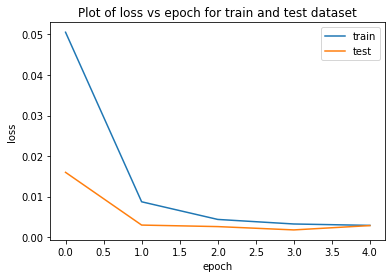

In [34]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
#plt.savefig('plots/ae_binary_loss.png')
plt.show()

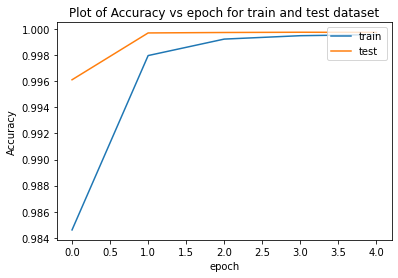

In [35]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of Accuracy vs epoch for train and test dataset")
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
#plt.savefig('plots/ae_binary_loss.png')
plt.show()

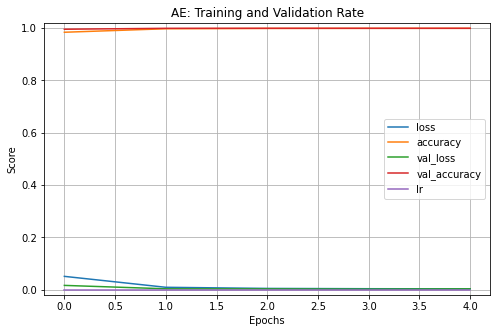

In [36]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(-0.02,1.02)
plt.title('LSTM: Training and Validation Rate')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.show()

In [37]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test = Y_test.argmax(axis=1)

In [38]:
pred.shape
y_test.shape

(262144,)

<AxesSubplot:>

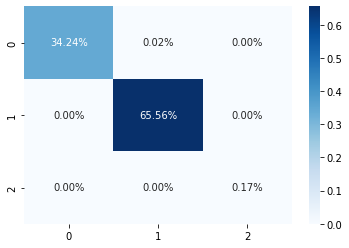

In [39]:
confMat = confusion_matrix(y_test, pred)
confMat

cf_matrix = confusion_matrix(y_test, pred)
sn.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [41]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing

start = dt.datetime.now()

escore = model.evaluate(X_test, Y_test, batch_size=32)
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(Y_test,axis=1)

score = metrics.accuracy_score(y_eval, pred)
rscore = recall_score(y_eval, pred, average='weighted')
ascore = precision_score(y_eval, pred, average='weighted')
f1score= f1_score(y_eval, pred, average='weighted') #F1 = 2 * (precision * recall) / (precision + recall) for manual

lb = preprocessing.LabelBinarizer()
lb.fit(y_eval)
y_eval = lb.transform(y_eval)
pred = lb.transform(pred)
roc_score = roc_auc_score(y_eval, pred)

print('Completed')
print('Time taken:',dt.datetime.now()-start)

print("Validation score: {}".format(score))
print("Evaluation score: {}".format(escore))
print("Recall score: {}".format(rscore))
print("Precision score: {}".format(ascore))
print("F1 Measure score: {}".format(f1score))
print("ROC-AUC score: {}".format(roc_score))

8192/8192 [==============================] - 629s 77ms/step - loss: 0.0029 - accuracy: 0.9997
Completed
Time taken: 0:20:40.647889
Validation score: 0.9997482299804688
Evaluation score: [0.0028573523741215467, 0.9997482299804688]
Recall score: 0.9997482299804688
Precision score: 0.9997483591913574
F1 Measure score: 0.9997482330696782
ROC-AUC score: 0.9979723902709381


# CNN LSTM Hybrid

In [21]:
from keras.layers import Dense, Dropout, Activation, Embedding, Flatten
from keras.layers import LSTM, GRU, Bidirectional, BatchNormalization, Convolution1D, MaxPooling1D, Reshape

#Bidirectional CNN-LSTM
batch_size = 32
model = Sequential()
model.add(Convolution1D(64, kernel_size=76, padding="same",activation="relu",input_shape=(76, 1)))
#model.add(MaxPooling1D(pool_length=(5)))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(64, return_sequences=False))) 
model.add(Reshape((128, 1), input_shape = (128, )))
    
#model.add(MaxPooling1D(pool_length=(5)))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(128, return_sequences=False))) 
    
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

model.summary()

#optimizer
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 76, 64)            4928      
                                                                 
 batch_normalization_2 (Batc  (None, 76, 64)           256       
 hNormalization)                                                 
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 reshape_1 (Reshape)         (None, 128, 1)            0         
                                                                 
 batch_normalization_3 (Batc  (None, 128, 1)           4         
 hNormalization)                                                 
                                                      

In [22]:
early_stop_callback = keras.callbacks.EarlyStopping(monitor='loss', patience=5)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                  patience=3, min_lr=0.0001)
    
history = model.fit(X_train, Y_train,
                              batch_size=128,
                              epochs=30,
                              verbose=True,
                              validation_data=(X_test, Y_test),
                              callbacks=[reduce_lr, early_stop_callback])  

Epoch 1/30
6144/6144 [==============================] - 159s 25ms/step - loss: 0.0081 - accuracy: 0.9990 - val_loss: 3.4821e-05 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 2/30
6144/6144 [==============================] - 151s 25ms/step - loss: 3.3334e-04 - accuracy: 0.9999 - val_loss: 1.6036e-05 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 3/30
6144/6144 [==============================] - 151s 25ms/step - loss: 1.1207e-04 - accuracy: 1.0000 - val_loss: 3.7672e-05 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 4/30
6144/6144 [==============================] - 151s 25ms/step - loss: 2.4211e-05 - accuracy: 1.0000 - val_loss: 3.1198e-05 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 5/30
6144/6144 [==============================] - 151s 25ms/step - loss: 5.7918e-05 - accuracy: 1.0000 - val_loss: 4.4506e-05 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 6/30
6144/6144 [==============================] - 150s 24ms/step - loss: 7.2686e-06 - accuracy: 1.0000 - val_loss: 2.2771e-07 - val_accura

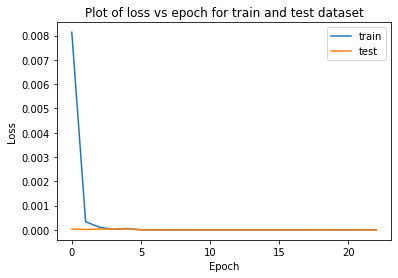

In [23]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
#plt.savefig('plots/ae_binary_loss.png')
plt.show()

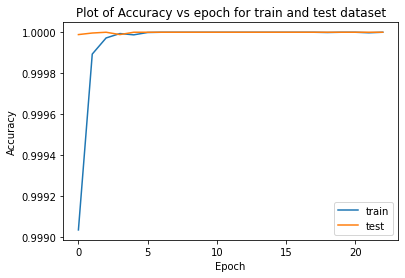

In [31]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of Accuracy vs epoch for train and test dataset")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
#plt.savefig('plots/ae_binary_loss.png')
plt.show()

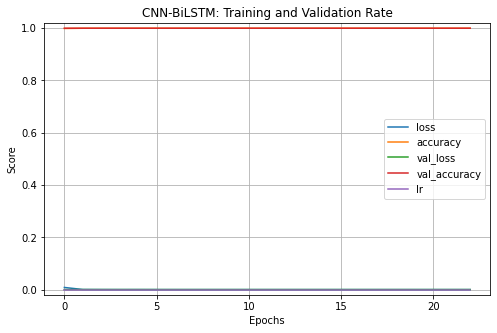

In [30]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(-0.02,1.02)
plt.title('CNN-BiLSTM: Training and Validation Rate')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.show()

In [26]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test = Y_test.argmax(axis=1)

In [27]:
pred.shape
y_test.shape

(262144,)

<AxesSubplot:>

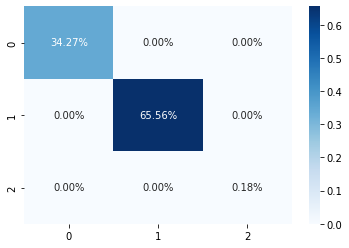

In [28]:
confMat = confusion_matrix(y_test, pred)
confMat

cf_matrix = confusion_matrix(y_test, pred)
sn.heatmap(cf_matrix / np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [29]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing

start = dt.datetime.now()

escore = model.evaluate(X_test, Y_test, batch_size=32)
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(Y_test,axis=1)

score = metrics.accuracy_score(y_eval, pred)
rscore = recall_score(y_eval, pred, average='weighted')
ascore = precision_score(y_eval, pred, average='weighted')
f1score= f1_score(y_eval, pred, average='weighted') #F1 = 2 * (precision * recall) / (precision + recall) for manual

lb = preprocessing.LabelBinarizer()
lb.fit(y_eval)
y_eval = lb.transform(y_eval)
pred = lb.transform(pred)
roc_score = roc_auc_score(y_eval, pred)

print('Completed')
print('Time taken:',dt.datetime.now()-start)

print("Validation score: {}".format(score))
print("Evaluation score: {}".format(escore))
print("Recall score: {}".format(rscore))
print("Precision score: {}".format(ascore))
print("F1 Measure score: {}".format(f1score))
print("ROC-AUC score: {}".format(roc_score))

8192/8192 [==============================] - 66s 8ms/step - loss: 2.1757e-07 - accuracy: 1.0000
Completed
Time taken: 0:02:01.740107
Validation score: 1.0
Evaluation score: [2.1756687829110888e-07, 1.0]
Recall score: 1.0
Precision score: 1.0
F1 Measure score: 1.0
ROC-AUC score: 1.0
